First of all, this tutorial (https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78) was the biggest inspiration for my tutorial 

<h2> FINDING THE FACE IN THE IMAGE </h2>

In [1]:
# First, making sure i'm on the 
%cd /home/beatrizoliveira/Documentos/IA/face_recognition

/home/beatrizoliveira/Documentos/IA/face_recognition


In [2]:
import sys, os
import dlib # need to install cmake and boost'sudo apt-get install cmake'...
from skimage import io

In [3]:
face_detector = dlib.get_frontal_face_detector() #creates HOG face detector

In [45]:
# transform image to array

image = io.imread('will_ferrell.jpg')

In [46]:
# Run the HOG face detector on the image data 
# Result will be the bounding boxes of the faces in our image

detected_faces = face_detector(image, 1)


In [47]:
import cv2

# loop over detected faces

for face in detected_faces:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

In [48]:
# Show image with face recognition rectangle

from matplotlib import pyplot as plt
plt.imshow(image)


<h2> FACE LANDMARK ESTIMATION </h2>

In [49]:
# You can download the required pre-trained face detection model here:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "shape_predictor_68_face_landmarks.dat" 

In [50]:
# Creates a HOG shape detector
face_pose_predictor = dlib.shape_predictor(predictor_model)

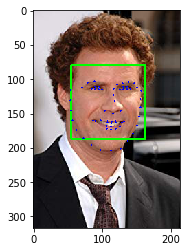

In [51]:
from imutils import face_utils

# get coordinates from shape 
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
 
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
 
    # return the list of (x, y)-coordinates
    return coords

# Loop through each face we found in the image

# Note that this loop was used before to draw the face rectangle
# Just doing this again because it's for educational purpose, so i'm doing step by step
# But we could have done the step in the loop bellow before

for i, face_rect in enumerate(detected_faces):
    
    ### Dlib shape predictor searchs for 68 distint points of a face rect
    ### (There are other models with more points - like HELEN model - but this one works just fine)
    # for more info: https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/
    shape = face_pose_predictor(image, face_rect)
    shape = face_utils.shape_to_np(shape)

 
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        
plt.imshow(image)


<h2> FACE TRANSFORMATION USING LANDMARKS</h2>

<h3> Now that we found the face landmarks, we got to have the face centralized in the image for better predictions </h3>

In [52]:
# the one lib that matters
# it's really shitty to install, follow this:
##git clone https://github.com/cmusatyalab/openface.git
##cd openface
##pip install -r requirements.txt
##sudo python setup.py install
import openface

In [53]:
face_aligner = openface.AlignDlib(predictor_model)

In [54]:
# So, this loop again (no dejávu here)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

    # Use openface to calculate and perform the face alignment
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

    # Save the aligned image to a file
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)
    

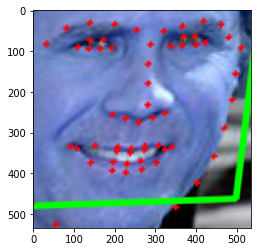

In [55]:
# Showing aligned image (just for )

aligned_img = plt.imread('aligned_face_0.jpg')
plt.imshow(aligned_img)

<h3> The image above is kinda ugly, we don't want that, so we got to rewrite some steps above for a clean and beautiful centralized image</h3>

In [56]:

# Load the image again
image = io.imread('will_ferrell.jpg')

In [57]:
# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

print("Found {} faces in the image file {}".format(len(detected_faces), 'will_ferrell.jpg'))

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

    # Get the the face's pose
    pose_landmarks = face_pose_predictor(image, face_rect)

    # Use openface to calculate and perform the face alignment
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

    # Save the aligned image to a file
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

Found 1 faces in the image file will_ferrell.jpg


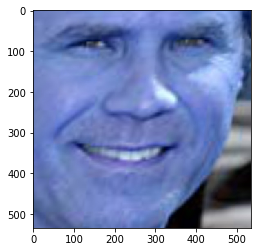

In [58]:
aligned_image = plt.imread('aligned_face_0.jpg')
plt.imshow(aligned_image)

# b e a t i f u l

<h1> THE GRAND FINALE: TELLING FACES APART </h1>

<h4> finally </h4>

In [20]:
# The face_recognition lib does everything we did above and more
# It uses the OpenFace embeddings and and SVM classifier
# BUT OpenFace is a lua script, really hard to run on jupyter 
# SO the best alternative is depend on face_recognition
import face_recognition
from matplotlib import pyplot as plt
import sys, os
import dlib # need to install cmake and boost'sudo apt-get install cmake'...
import openface
import cv2

In [21]:
# Before getting the image encodings we got to reshape the images to size 96 x 96
# This function does everything we did before and rezise the image
def img_reshape(image_path):
    image_filename = os.path.basename(image_path)
    image = plt.imread(image_path)
    face_detector = dlib.get_frontal_face_detector() #creates HOG face detector
    predictor_model = "shape_predictor_68_face_landmarks.dat" 
    face_aligner = openface.AlignDlib(predictor_model)
    face_pose_predictor = dlib.shape_predictor(predictor_model)
    # Run the HOG face detector on the image data
    detected_faces = face_detector(image, 1)
    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):

        # Get the the face's pose
        pose_landmarks = face_pose_predictor(image, face_rect)

        # Use openface to calculate and perform the face alignment
        alignedFace = face_aligner.align(96, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

        # Save the aligned image to a file
        if not os.path.exists('aligned_images/'+image_filename.split(".")[0]):
            os.makedirs('aligned_images/'+image_filename.split(".")[0])
        
        cv2.imwrite("aligned_images/"+image_filename.split(".")[0]+ '/' +image_filename.split(".")[0]+"_{}.jpg".format(i), alignedFace)
    

In [22]:
# This package can classify faces only if there are unknown faces to compare
img_reshape('will_ferrell.jpg')
img_reshape('barack.jpg')

In [23]:
known_image = plt.imread('aligned_images/will_ferrell/will_ferrell_0.jpg')
unknown_image = plt.imread('aligned_images/barack/barack_0.jpg')

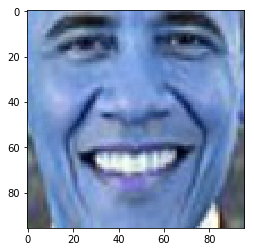

In [24]:
plt.imshow(unknown_image)

In [25]:
try:
    will_ferrell_encoding = face_recognition.face_encodings(known_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()
    
    
will_ferrell_encoding

array([-0.0263564 ,  0.07816548,  0.00545003, -0.10943277, -0.07604235,
        0.00275264,  0.01924892, -0.09965146,  0.07406069,  0.07075451,
        0.21691905, -0.01595143, -0.31295896, -0.11503865, -0.02329089,
        0.07065867, -0.17498963,  0.00103989, -0.15240555, -0.10901274,
       -0.04419596, -0.00698687,  0.0769683 , -0.01910894, -0.12357834,
       -0.27635026, -0.06698507, -0.16762124, -0.03171508, -0.16429842,
        0.04405525,  0.00046733, -0.26631156, -0.09971379, -0.06284659,
       -0.05989921, -0.17129388, -0.09196969,  0.21773043,  0.03846913,
       -0.05302944,  0.05883642,  0.10190758,  0.24254623,  0.2400988 ,
       -0.04134882,  0.02323089, -0.03866487,  0.15041722, -0.27709889,
        0.01010391,  0.12416126,  0.12278681,  0.09401333,  0.0519313 ,
       -0.12118931,  0.04924135,  0.09232847, -0.23834515,  0.06865954,
        0.04269451, -0.05188788, -0.13845691, -0.02065406,  0.20807865,
        0.10042331, -0.11746892, -0.10318793,  0.12440488, -0.09

In [26]:
known_faces = [
    will_ferrell_encoding
]

# Import the prerequisite libraries

We will be importing utils.py from https://github.com/iwantooxxoox/Keras-OpenFace/blob/master/utils.py (available with code) which contains utility functions to create the neural network and load the weights assoiated with it.
    

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.engine.topology import Layer
from keras import backend as K
import cv2
from matplotlib import pyplot as plt
import os, sys
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from utils import LRN2D
import utils

%load_ext autoreload
%autoreload 2

np.set_printoptions(threshold=sys.maxsize)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# model declaration
# the last layer is a custom function that calculates the loss from triplet loss
myInput = Input(shape=(96, 96, 3))

x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = Lambda(LRN2D, name='lrn_1')(x)
x = Conv2D(64, (1, 1), name='conv2')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = Conv2D(192, (3, 3), name='conv3')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
x = Activation('relu')(x)
x = Lambda(LRN2D, name='lrn_2')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# Inception3a
inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
inception_3a_pool = Activation('relu')(inception_3a_pool)
inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

# Inception3b
inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
inception_3b_pool = Activation('relu')(inception_3b_pool)
inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

# Inception3c
inception_3c_3x3 = utils.conv2d_bn(inception_3b,
                                   layer='inception_3c_3x3',
                                   cv1_out=128,
                                   cv1_filter=(1, 1),
                                   cv2_out=256,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(2, 2),
                                   padding=(1, 1))

inception_3c_5x5 = utils.conv2d_bn(inception_3b,
                                   layer='inception_3c_5x5',
                                   cv1_out=32,
                                   cv1_filter=(1, 1),
                                   cv2_out=64,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(2, 2),
                                   padding=(2, 2))

inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

#inception 4a
inception_4a_3x3 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=192,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))
inception_4a_5x5 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_5x5',
                                   cv1_out=32,
                                   cv1_filter=(1, 1),
                                   cv2_out=64,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(1, 1),
                                   padding=(2, 2))

inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)
inception_4a_pool = utils.conv2d_bn(inception_4a_pool,
                                   layer='inception_4a_pool',
                                   cv1_out=128,
                                   cv1_filter=(1, 1),
                                   padding=(2, 2))
inception_4a_1x1 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))
inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

#inception4e
inception_4e_3x3 = utils.conv2d_bn(inception_4a,
                                   layer='inception_4e_3x3',
                                   cv1_out=160,
                                   cv1_filter=(1, 1),
                                   cv2_out=256,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(2, 2),
                                   padding=(1, 1))
inception_4e_5x5 = utils.conv2d_bn(inception_4a,
                                   layer='inception_4e_5x5',
                                   cv1_out=64,
                                   cv1_filter=(1, 1),
                                   cv2_out=128,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(2, 2),
                                   padding=(2, 2))
inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

#inception5a
inception_5a_3x3 = utils.conv2d_bn(inception_4e,
                                   layer='inception_5a_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=384,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))

inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)
inception_5a_pool = utils.conv2d_bn(inception_5a_pool,
                                   layer='inception_5a_pool',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   padding=(1, 1))
inception_5a_1x1 = utils.conv2d_bn(inception_4e,
                                   layer='inception_5a_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))

inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

#inception_5b
inception_5b_3x3 = utils.conv2d_bn(inception_5a,
                                   layer='inception_5b_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=384,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))
inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
inception_5b_pool = utils.conv2d_bn(inception_5b_pool,
                                   layer='inception_5b_pool',
                                   cv1_out=96,
                                   cv1_filter=(1, 1))
inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

inception_5b_1x1 = utils.conv2d_bn(inception_5a,
                                   layer='inception_5b_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))
inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)


# See that there are 3 layers at the end, the norm layer is that loss custom function mentioned before
reshape_layer = Flatten()(av_pool)
dense_layer = Dense(128, name='dense_layer')(reshape_layer)
norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)


# Final Model
model = Model(inputs=[myInput], outputs=norm_layer)

In [29]:
# Add a pretained model from OpenFace (https://cmusatyalab.github.io/openface/models-and-accuracies/#pre-trained-models)
# When you download the model weights from the OpenFace page, you get a .t7 file, so the very first step is to
# convert .t7 file to .h5
# Oooor you could just download it from here (https://github.com/iwantooxxoox/Keras-OpenFace/tree/master/model)
# (just like i did)

# See the original model here: https://github.com/iwantooxxoox/Keras-OpenFace/blob/master/Keras-openface-convertion.ipynb

model.load_weights('weights/nn4.small2.v1.h5')

array([ 0.03116279,  0.1743061 ,  0.06819515, -0.0144399 , -0.03711434,
        0.12211379, -0.11623288, -0.05539132, -0.1044405 , -0.11498298,
        0.00248444, -0.12697883, -0.08947644, -0.10948519,  0.06686154,
       -0.02458956, -0.01943103, -0.1301514 ,  0.09270646, -0.09361687,
        0.03071998,  0.02609304, -0.05842523, -0.0868758 ,  0.13411096,
       -0.01341081, -0.04903255, -0.03019251,  0.05346113, -0.05642677,
        0.13258971, -0.10160116, -0.09087984, -0.02411601,  0.07883416,
        0.04334652,  0.00700526, -0.10830086,  0.21552879,  0.00460602,
       -0.00213674, -0.05696676, -0.02869675, -0.08191209,  0.14684433,
        0.20937824,  0.06405737, -0.02454647, -0.23172614, -0.10473406,
       -0.15191767,  0.15880075,  0.13795513, -0.03834278, -0.16128793,
       -0.03295894,  0.02024018, -0.01011324, -0.09066116, -0.04219573,
        0.05222027,  0.16527551,  0.03696859, -0.05000223, -0.03363437,
        0.07682899,  0.09993903,  0.05682613,  0.03459819, -0.02

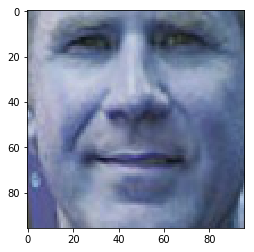

In [43]:
# Before calculation the best distance threshold τ, let me show how the algorithm works on three images, two 
# from the same guy and one from a different guy

# Let's get another Will Ferrell picture and normalize it
another_known_image = plt.imread('aligned_images/Will_Ferrell_2013/Will_Ferrell_2013_0.jpg')
img = (another_known_image / 255.).astype(np.float32)
img2 = (known_image / 255.).astype(np.float32)
plt.imshow(another_known_image) # nice
try:
    another_will_ferrell_encoding = model.predict(np.expand_dims(img, axis=0))[0] ###### NOTICE THAT WE USED
                                                                                  # THE MODEL INSTEAD OF THAT 
                                                                                  #  LIB FUNCTION
    will_ferrell_encoding = model.predict(np.expand_dims(img2, axis=0))[0] 
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()
    
will_ferrell_encoding

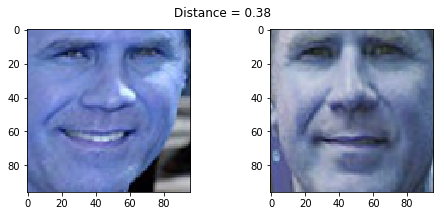

In [44]:
# Now, calculating the distance from the encondings of the images of Will Ferrell

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

embedded1 = will_ferrell_encoding
embedded2 = another_will_ferrell_encoding
plt.figure(figsize=(8,3))
plt.suptitle(f'Distance = {distance(embedded1, embedded2):.2f}')
plt.subplot(121)
plt.imshow(known_image)
plt.subplot(122)
plt.imshow(another_known_image);    



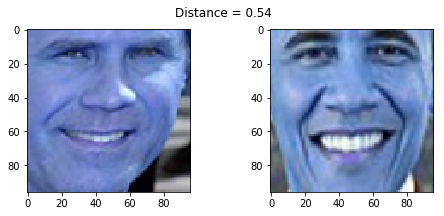

In [32]:
# The code was so smoth that the distance between the encondings of the same guy was 0.38!!
# Now, calculating the distance from the encondings of the image of Will Ferrell and another from other guy (Barack Obama)

embedded1 = will_ferrell_encoding
embedded2 = unknown_face_encoding
plt.figure(figsize=(8,3))
plt.suptitle(f'Distance = {distance(embedded1, embedded2):.2f}')
plt.subplot(121)
plt.imshow(known_image)
plt.subplot(122)
plt.imshow(unknown_image);    



<h2> Magical, right? This works fine for this example, but what if we had more data... <h2>

In [33]:
# Now we want to calculate the optimal value for τ, the distance threshold
# BUT, to find this optimal value we got to add more samples to the dataset, like it's done bellow
# I'm using a dataset of 6 photos from Chad Smith, Will Ferrell and Jimmy Fallon, each
# At the end, we will show how their faces can be differentiated

## This section was based on the code of krasserm (http://krasserm.github.io/2018/02/07/deep-face-recognition/)

import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('training_images')

In [34]:
# Reweriting the alingment function (this time, the function doesn't save the aligned in a file )
def img_reshape(image_path):
    image = plt.imread(image_path)
    face_detector = dlib.get_frontal_face_detector() #creates HOG face detector
    predictor_model = "shape_predictor_68_face_landmarks.dat" 
    face_aligner = openface.AlignDlib(predictor_model)
    # Run the HOG face detector on the image data
    detected_faces = face_detector(image, 1)
    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):

        # Use openface to calculate and perform the face alignment
        alignedFace = face_aligner.align(96, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        return alignedFace

In [35]:
# Getting the embeddings
embedded = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    img = img_reshape(m.image_path())
    # scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    # obtain embedding vector for image
    embedded[i] = model.predict(np.expand_dims(img, axis=0))[0]

In [36]:
## Therefore, calculating the optimal distance threshold
# We use f1_score instead of accuracy since we're using skewd classes

from sklearn.metrics import f1_score, accuracy_score

distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(metadata)

for i in range(num - 1):
    for j in range(1, num):
        distances.append(distance(embedded[i], embedded[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances = np.array(distances)
identical = np.array(identical)

In [37]:
thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

In [38]:
opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)


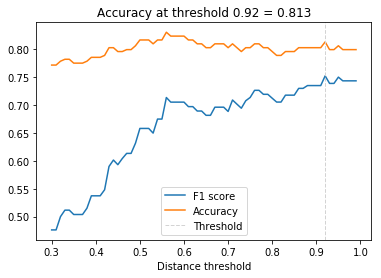

In [39]:
# Some graphs to show the beauty of this process
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}'); #opt_tau is the infamous optimal value we 
                                                                   # were looking for
plt.xlabel('Distance threshold')
plt.legend();

<h3> Now, adding the KNN classification </h3> 

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')


KNN accuracy = 1.0, SVM accuracy = 0.8888888888888888


face [(366, 283) (474, 390)]
['will_ferrell']
face [(1250, 245) (1340, 335)]
['jimmy_fallon']
face [(653, 315) (743, 405)]
['chad_smith']


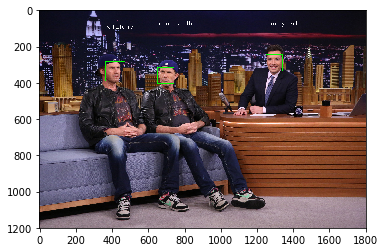

In [41]:
# Testing the classifier
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

face_detector = dlib.get_frontal_face_detector() #creates HOG face detector

img =  plt.imread('test.jpg')

detected_faces = face_detector(img, 1)
predictor_model = "shape_predictor_68_face_landmarks.dat" 
face_aligner = openface.AlignDlib(predictor_model)

for i, face in enumerate(detected_faces):
    print("face", face)
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y
    
    # Use openface to calculate and perform the face alignment
    alignedFace = face_aligner.align(96, img, face, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

    # Save the aligned image to a file
    aligned_fn = "aligned_face_"+str(i)+".jpg"
    cv2.imwrite(aligned_fn.format(i), alignedFace)
    
    imgp = plt.imread(aligned_fn)
    imgp = imgp[...,::-1]
    # scale RGB values to interval [0,1]
    imgp = (imgp / 255.).astype(np.float32)
    # obtain embedding vector for image
    embedded_test = model.predict(np.expand_dims(imgp, axis=0))[0]
    embedded_test = embedded_test.reshape(1, -1)

    example_prediction = svc.predict(embedded_test)
    example_identity = encoder.inverse_transform(example_prediction)

    print(example_identity)
    name = example_identity[0]

    # draw box over face
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(img, name, (x + 6, h - 6), font, 1.0, (255, 255, 255), 1)

plt.imshow(img)

<h1> THE END </h1>